### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from IPython.display import Image, display

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [103]:
data = pd.read_csv('data/coupons.csv')

In [104]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [105]:
#data.info()

#Commenting code to avoid long string display

2. Investigate the dataset for missing or problematic data.

In [106]:
data.describe()

# Here I was checking for Mean, STD, Min and Max Statistics on numerical columns

# Below stats shows that direction_same is inverse of direction_opp. 
# We can maintain just one column and query accordingly when needed.

# Interestingly 'toCoupon_GEQ5min' has 1.0 Mean. 
# This is not a useful data for creating a model. We can eliminate this column.


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


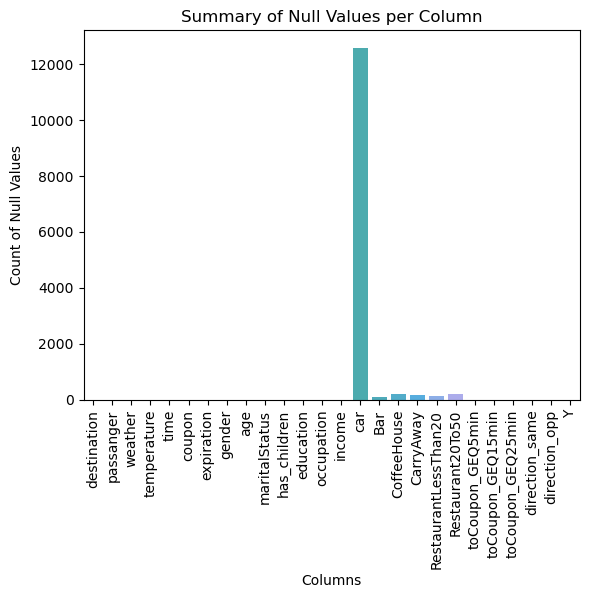

In [107]:
isNullSummary_data = data.isnull().sum()
sns.barplot(x=isNullSummary_data.index, y=isNullSummary_data.values)
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.title('Summary of Null Values per Column')
plt.xticks(rotation=90)
plt.show()


# Range of data set is 12684 rows. Out of that more than 12000 rows has Car column as NaN. 

# Just the remaining rows cannot be an effective data for creating a model. So this column can also removed. 



In [108]:
data.duplicated().sum()


# Though there are duplicates rows, duplicacy could be based on 2 different users and could be genuine.

# In the given data set there is no user id or name to validate that. 

# Also removing 37 'duplicated' rows from 12684 rows will not have that much of an impact

# Removing duplicates without proper data backing will reduce the frequency and change the distribution.

# So based on above analysis I am not removing the duplicates


74

In [109]:
# Wanted to understand the count of each descriptive categories (Object data types) in the data set.
# Based on the inference, can I replace values, merge values or drop columns ?


#categorical_columns = data.select_dtypes(include=['object']).columns

#for column in categorical_columns:
#    print(f"Value counts for column '{column}':")
#    print(data[column].value_counts(dropna=False))
#    print()
    
    
# Commenting code above to ignore long strings. Based on the analysis
    
# Age we can convert to int64, 'below 21' and '50plus' could be 20 and 50 respectively. 

# In any column 'never' and 'less1' are one and the same, can be replaced as never or lt1


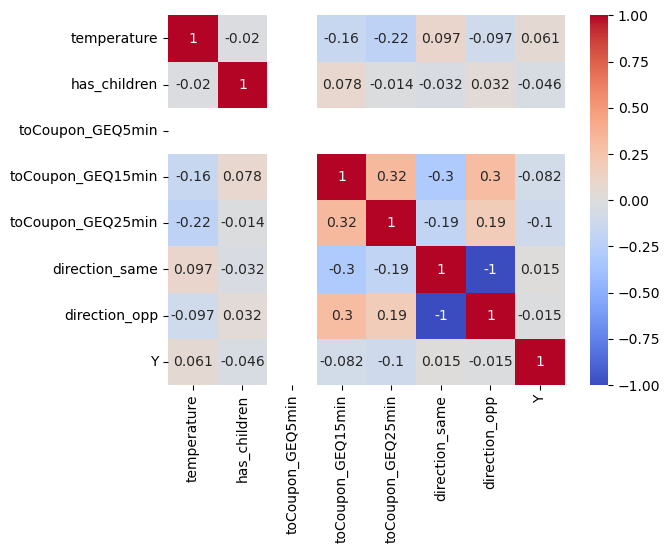

In [55]:
sns.heatmap(data[['temperature','has_children','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp','Y']].corr(), annot=True, cmap='coolwarm')
plt.show()

# Trying to look for correlation and relationship between variables to avoid redundancy, high correlation between independent variables

# Across 'toCoupon_GEQ5min' we can see White, which represents low correlation to other columns, very close to 0. 

# As mentioned above this column above has no value to the data set itself for certain queries.

# So we do not need to use that columns for any data visualization.

3. Decide what to do about your missing data -- drop, replace, other...

In [56]:
# Dropping 'car','direction_opp' column from the data set.

# Replace Age 'below 21' and '50plus' to 20 and 50 respectively and then convert to int64.

# Replace Never, Less1 as same value, say 'lt1', for any categorical Column.

# Creating a new data set to do everything above.

# And confirming all the changes one more time.


columns_to_drop = ['car', 'direction_opp']

clean_data = data.drop(columns=columns_to_drop)


clean_data['direction_same'] = clean_data.apply(lambda row: 'Same' if row['direction_same'] == 1 else 'Opposite', axis=1)


text_to_replace = {'less1': 'lt1', 'never': 'lt1', 'below21' : '20', '50plus' : '50'}

clean_data = clean_data.replace(text_to_replace)


clean_data['age'] = pd.to_numeric(clean_data['age'])


# Commenting code below to avoid long strings in the output

#clean_data.info()

#print(clean_data)


#categorical_columns = clean_data.select_dtypes(include=['object']).columns

#for column in categorical_columns:
#    print(f"Value counts for column '{column}':")
#    print(clean_data[column].value_counts(dropna=False))
#    print()   


4. What proportion of the total observations chose to accept the coupon? 



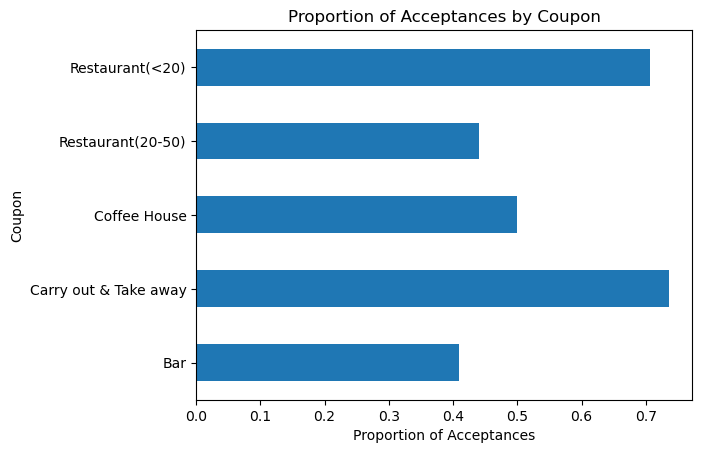

In [58]:
# Out of many categorical columns I find 'coupon' interesting. 

# Reason 1: Coupons has no null values.So it covers all the data in the set

# Reason 2: Along with propotion it also shows what type of coupons were accepted

# For this I grouped the data by coupon and 'Y' is 1 (accepted, MEAN takes only rows with values, in our case '1'). 
# I used horizontal bar.

# X-axis to be read in percentage


coupon_grouped = clean_data.groupby('coupon')['Y'].mean()

fig, ax = plt.subplots()
coupon_grouped.plot(kind='barh', ax=ax)
ax.set_xlabel('Proportion of Acceptances')
ax.set_ylabel('Coupon')
ax.set_title('Proportion of Acceptances by Coupon')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

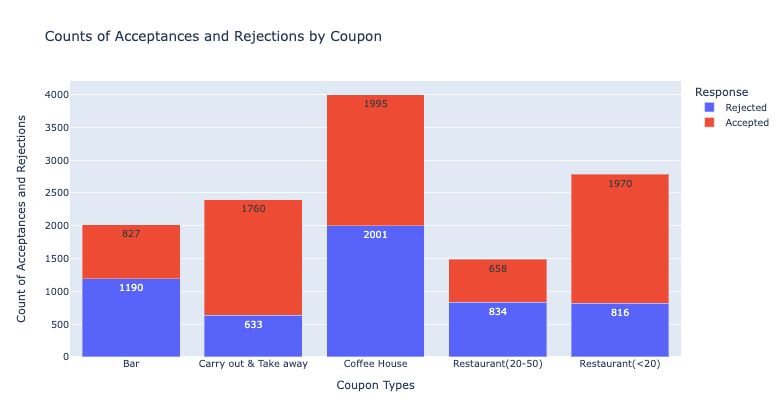

In [68]:
# Group cleaned data by Coupon and Acceptance column

# Renamed Y column values for easy readability 

# Used stacked bar to show both values of Y column for each coupon



coupon_counts = clean_data.groupby(['coupon', 'Y']).size().reset_index(name='count')

coupon_counts['Y'] = coupon_counts['Y'].map({1: 'Accepted', 0: 'Rejected'})

fig = px.bar(coupon_counts, x='coupon', y='count', color='Y', 
             title='Counts of Acceptances and Rejections by Coupon',
             labels={'coupon': 'Coupon Types', 'count': 'Count of Acceptances and Rejections', 'Y': 'Response'},
             text='count')

fig.update_layout(barmode='stack')
fig.show()

# Adding Image if Plotly did not load

display(Image(filename='images/Counts of Acceptances and Rejections by Coupon.png'))


6. Use a histogram to visualize the temperature column.

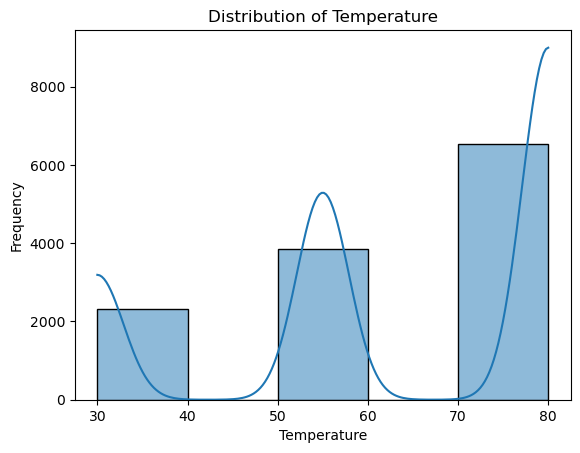

In [61]:
#temperature_hist = px.histogram(clean_data, x='temperature', nbins=6, title='Distribution of Temperature', labels={'temperature': 'Temperature'})
# temperature_hist.show()

# Did not like Plotly, but seaborn has good visualization with KDE


sns.histplot(data['temperature'], bins=5, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [62]:
bar_coupon_data = clean_data.query('coupon == "Bar"')
bar_coupon_data.shape[0]

2017

2. What proportion of bar coupons were accepted?


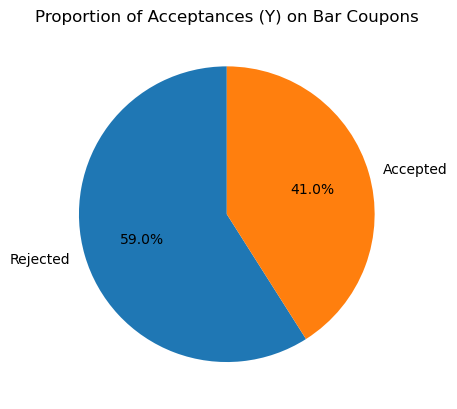

In [63]:
# Tried a pie chart to visualize proportion better

bar_coupon_acceptance = bar_coupon_data['Y'].value_counts(normalize=True)
labels = ['Accepted' if x == 1 else 'Rejected' for x in bar_coupon_acceptance.index]
plt.pie(bar_coupon_acceptance, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Acceptances (Y) on Bar Coupons')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


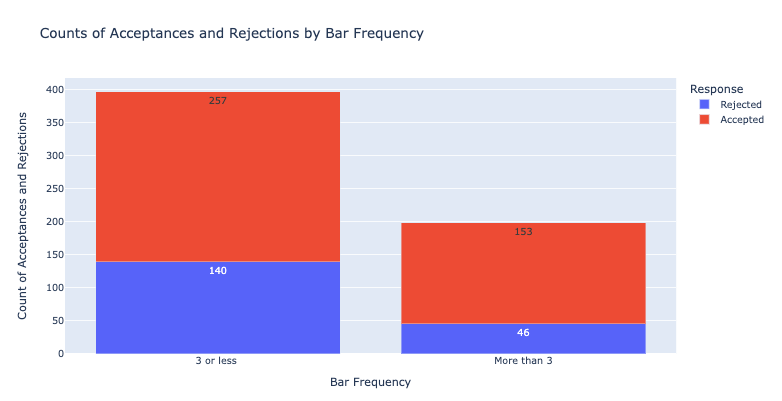

In [69]:
barFrequencyToQuery = ['1~3','4~8','gt8']

compareBarCouponData = bar_coupon_data.query('Bar in @barFrequencyToQuery')

compareBarCouponDataCopy = compareBarCouponData

textToReplace = {'1~3': '3 or less ', '4~8': 'More than 3', 'gt8' : 'More than 3'}

#driversWentToBar['Bar'] = driversWentToBar['Bar'].replace(text_to_replace)

for oldValue, newValue in textToReplace.items():
    compareBarCouponData.loc[compareBarCouponData['Bar'] == oldValue, 'Bar'] = newValue

#print(driversWentToBar['Bar'].value_counts(dropna=False))


numberofVisits = compareBarCouponData.groupby(['Bar', 'Y']).size().reset_index(name='count')

numberofVisits['Y'] = numberofVisits['Y'].map({1: 'Accepted', 0: 'Rejected'})

fig = px.bar(numberofVisits, x='Bar', y='count', color='Y', 
             title='Counts of Acceptances and Rejections by Bar Frequency',
             labels={'Bar': 'Bar Frequency', 'count': 'Count of Acceptances and Rejections', 'Y': 'Response'},
             text='count')

fig.update_layout(barmode='stack')
fig.show()

# Adding Image if Plotly did not load

display(Image(filename='images/Counts of Acceptances and Rejections by Bar Frequency.png'))


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


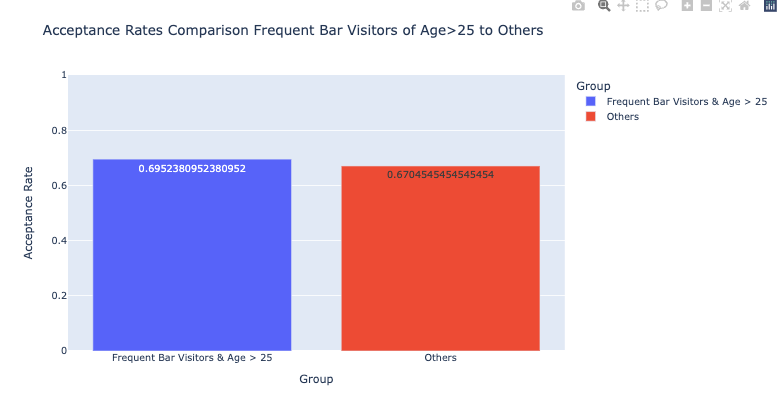

In [72]:
condition = compareBarCouponData['age'] > 25

barFrequencyDataAgeGT25 = compareBarCouponData[condition]['Y'].mean()

barFrequencyDataAgeLEQ25 = compareBarCouponData[~condition]['Y'].mean()

rates = pd.DataFrame({
    'Group': ['Frequent Bar Visitors & Age > 25', 'Others'],
    'Acceptance Rate': [barFrequencyDataAgeGT25, barFrequencyDataAgeLEQ25]
})

fig = px.bar(rates, x='Group', y='Acceptance Rate',
             title='Acceptance Rates Comparison Frequent Bar Visitors of Age>25 to Others',
             labels={'Acceptance Rate': 'Acceptance Rate', 'Group': 'Group'},
             color='Group',
             text='Acceptance Rate')

fig.update_layout(yaxis=dict(range=[0, 1]))  # Since it's a rate, it should be between 0 and 1
fig.show()

# Adding Image if Plotly did not load

display(Image(filename='images/Acceptance Rates Comparison Frequent Bar Visitors of Age>25 to Others.png'))



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


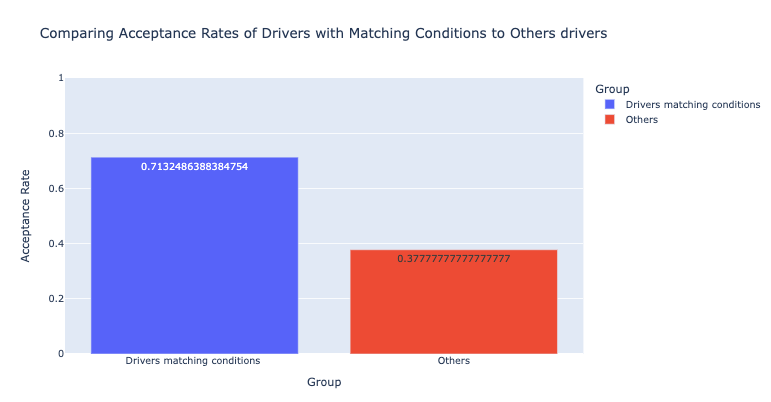

In [78]:
condition = ~compareBarCouponDataCopy['passanger'].isin(['Kid(s)']) & ~compareBarCouponDataCopy['occupation'].isin(['Farming Fishing & Forestry'])

barFrequencyDataMatchingCondition = compareBarCouponDataCopy[condition]['Y'].mean()

barFrequencyDataNotMatchingCondition = compareBarCouponDataCopy[~condition]['Y'].mean()


rates = pd.DataFrame({
    'Group': ['Drivers matching conditions ', 'Others'],
    'Acceptance Rate': [barFrequencyDataMatchingCondition, barFrequencyDataNotMatchingCondition]
})

fig = px.bar(rates, x='Group', y='Acceptance Rate',
             title='Comparing Acceptance Rates of Drivers with Matching Conditions to Others drivers',
             labels={'Acceptance Rate': 'Acceptance Rate', 'Group': 'Group'},
             color='Group',
             text='Acceptance Rate')

fig.update_layout(yaxis=dict(range=[0, 1]))
fig.show()

# Adding Image if Plotly did not load

display(Image(filename='images/Comparing Acceptance Rates of Drivers with Matching Conditions to Others drivers.png'))


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



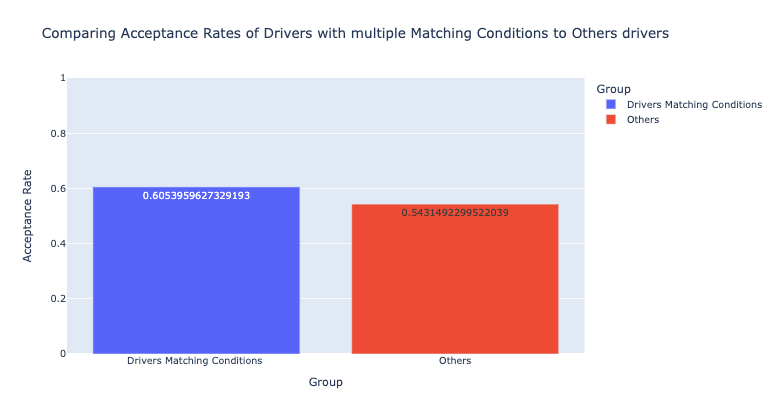

In [80]:
condition = (
    (clean_data['Bar'].isin(['1~3', '4~8', 'gt8']) & 
     ~clean_data['passanger'].str.contains("Kid(s)", regex=False) & 
     (clean_data['maritalStatus'] != 'Widowed')) |
    (clean_data['Bar'].isin(['1~3', '4~8', 'gt8']) & 
     (clean_data['age'] < 30)) |
    (clean_data['RestaurantLessThan20'].isin(['4~8', 'gt8']) & 
     (clean_data['income'].isin(['$37500 - $49999','$25000 - $37499','$12500 - $24999','Less than $12500'])))
)

dataMatchingCondition = clean_data[condition]['Y'].mean()
dataNotMatchingCondition = clean_data[~condition]['Y'].mean()


rates = pd.DataFrame({
    'Group': ['Drivers Matching Conditions ', 'Others'],
    'Acceptance Rate': [dataMatchingCondition, dataNotMatchingCondition]
})

fig = px.bar(rates, x='Group', y='Acceptance Rate',
             title='Comparing Acceptance Rates of Drivers with multiple Matching Conditions to Others drivers',
             labels={'Acceptance Rate': 'Acceptance Rate', 'Group': 'Group'},
             color='Group',
             text='Acceptance Rate')

fig.update_layout(yaxis=dict(range=[0, 1]))
fig.show()

# Adding Image if Plotly did not load

display(Image(filename='images/Comparing Acceptance Rates of Drivers with multiple Matching Conditions to Others drivers.png'))


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Bar Coupon Acceptance Analysis

 1) Out of 12684 rows only 2017 rows had Bar Coupons. This is around 15% percent of the total data set.
 2) On that 15% only 41% accepted the coupon.
 3) Drivers who go to bar 3 or less times has accepted the coupon more than those went to bar more than 3 times in a month. The diffrence is around 100 drivers between the two category.
 4) There is no much difference in coupon acceptance rate between the drivers who go to bar more than once a month and over the age of 25 to all others. Acceptance rates are 0.695 and 0.670 respectively. 
 5) And there is a mediocre difference between the acceptance rate of drivers who go to bar more than once and has no passanger as kids and also does occupation other than Farming, fishing or Forestry to all others. Acceptance rates are 0.713 and 0.377
 6) Also there is no significant acceptance rate difference between drivers who (go to bar more than once a month and passangera not kids and not Widowed) OR (go to bar more than once in a month and age under 30 ) OR (go to cheap restaurant more than 4 times a month and income less than 50K ) to all others. Acceptance rates are 0.605 and 0.543

### Hypothesis 

 The analysis reveals that certain demographic and behavioral factors influence the acceptance of bar coupons, but the differences are not always substantial. Therefore, a nuanced marketing strategy that considers a combination of factors, such as age, social activity, family responsibilities, and occupation, might be more effective in increasing the acceptance rates of bar coupons. Further detailed analysis and segmentation could help in identifying more specific target groups and tailoring marketing efforts accordingly.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers (drivers) who accept the coupons.  

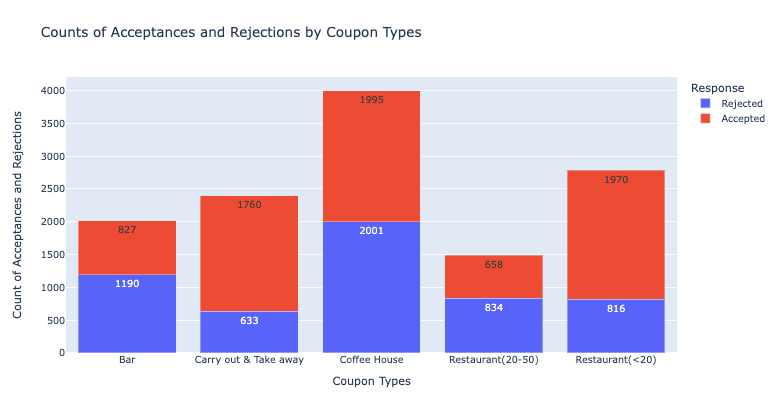

In [83]:
coupon_counts = clean_data.groupby(['coupon', 'Y']).size().reset_index(name='count')

# Map Y values to readable labels
coupon_counts['Y'] = coupon_counts['Y'].map({1: 'Accepted', 0: 'Rejected'})

# Create stacked bar plot
fig = px.bar(coupon_counts, x='coupon', y='count', color='Y', 
             title='Counts of Acceptances and Rejections by Coupon Types',
             labels={'coupon': 'Coupon Types', 'count': 'Count of Acceptances and Rejections', 'Y': 'Response'},
             text='count')

fig.update_layout(barmode='stack')
fig.show()

# Adding Image if Plotly did not load

display(Image(filename='images/Counts of Acceptances and Rejections by Coupon Types.png'))



# Based on the analysis Coffee House has a good data set

### Coffee House 

Based on the bar plot above above Coffee Houser has a good mix of coupon Acceptance and Rejection.

In [46]:
coffeeHouseFrequencyToQuery = ['1~3','4~8','gt8']
coffee_house_data = clean_data.query('CoffeeHouse in @coffeeHouseFrequencyToQuery')

coffee_house_coupon_accepted = clean_data.query('CoffeeHouse in @coffeeHouseFrequencyToQuery and Y == 1')
                                    

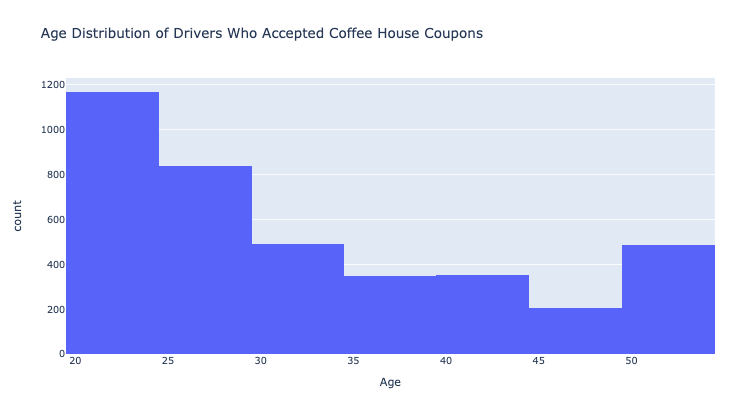

In [85]:
fig_age = px.histogram(coffee_house_coupon_accepted, x='age', nbins=10, title='Age Distribution of Drivers Who Accepted Coffee House Coupons',
                       labels={'age': 'Age'})

fig_age.show()

# Adding Image if Plotly did not load

display(Image(filename='images/Age Distribution of Drivers Who Accepted Coffee House Coupons.png'))


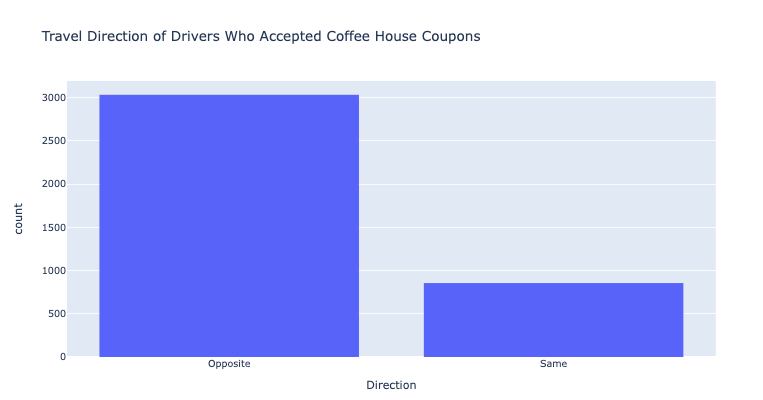

In [100]:
fig_age = px.histogram(coffee_house_coupon_accepted, x='direction_same', nbins=10, title='Travel Direction of Drivers Who Accepted Coffee House Coupons',
                       labels={'direction_same': 'Direction'})

fig_age.show()

# Adding Image if Plotly did not load

display(Image(filename='images/Travel Direction of Drivers Who Accepted Coffee House Coupons.png'))



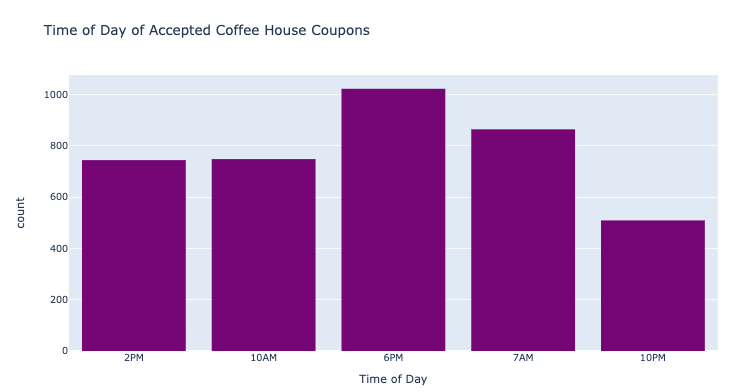

In [88]:
fig_time = px.histogram(coffee_house_coupon_accepted, x='time', title='Time of Day of Accepted Coffee House Coupons',
                        labels={'time': 'Time of Day'}, color_discrete_sequence=['purple'])

fig_time.show()


# Adding Image if Plotly did not load

display(Image(filename='images/Time of Day of Accepted Coffee House Coupons.png'))


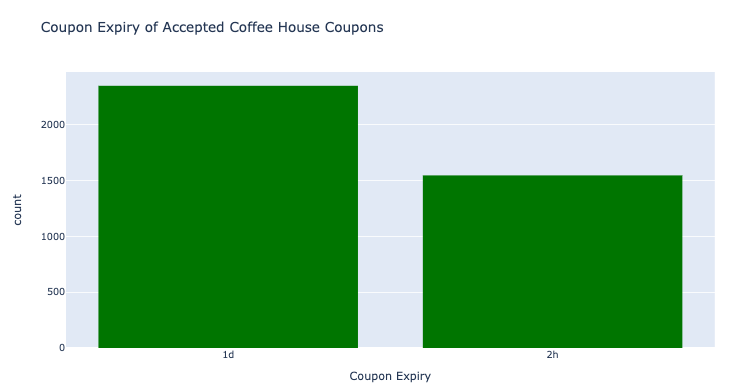

In [89]:
fig_expiry = px.histogram(coffee_house_coupon_accepted, x='expiration', title='Coupon Expiry of Accepted Coffee House Coupons',
                          labels={'expiration': 'Coupon Expiry'}, color_discrete_sequence=['green'])

fig_expiry.show()

# Adding Image if Plotly did not load

display(Image(filename='images/Coupon Expiry of Accepted Coffee House Coupons.png'))


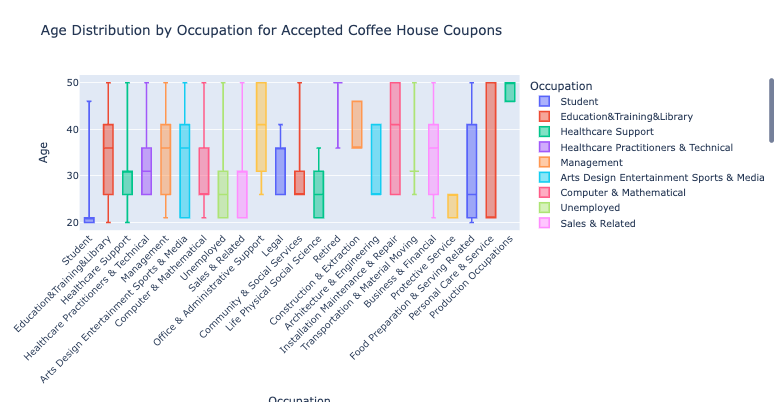

In [90]:
fig_box = px.box(coffee_house_coupon_accepted, x='occupation', y='age', 
                 title='Age Distribution by Occupation for Accepted Coffee House Coupons',
                 labels={'age': 'Age', 'occupation': 'Occupation'},
                 color='occupation')

fig_box.update_layout(xaxis_tickangle=-45)

# Box Plot removing Outliers
fig_box.update_traces(boxpoints=False)

fig_box.show()

# Adding Image if Plotly did not load

display(Image(filename='images/Age Distribution by Occupation for Accepted Coffee House Coupons.png'))


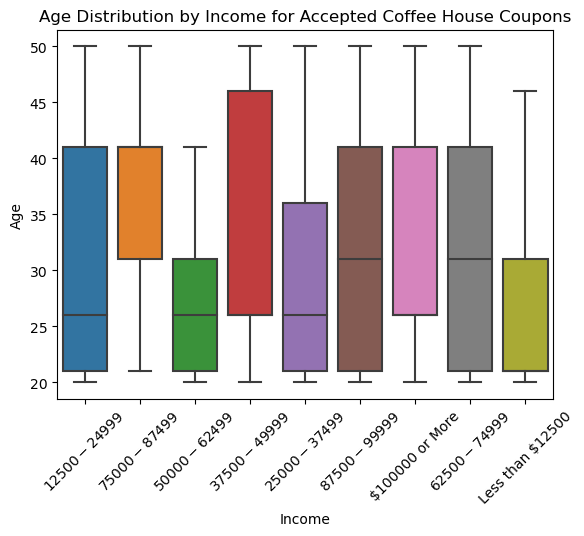

In [96]:
# Box Plot removing Outliers

sns.boxplot(x='income', y='age', data=coffee_house_coupon_accepted, showfliers=False)

plt.xticks(rotation=45)

plt.title('Age Distribution by Income for Accepted Coffee House Coupons')
plt.xlabel('Income')
plt.ylabel('Age')

plt.show()

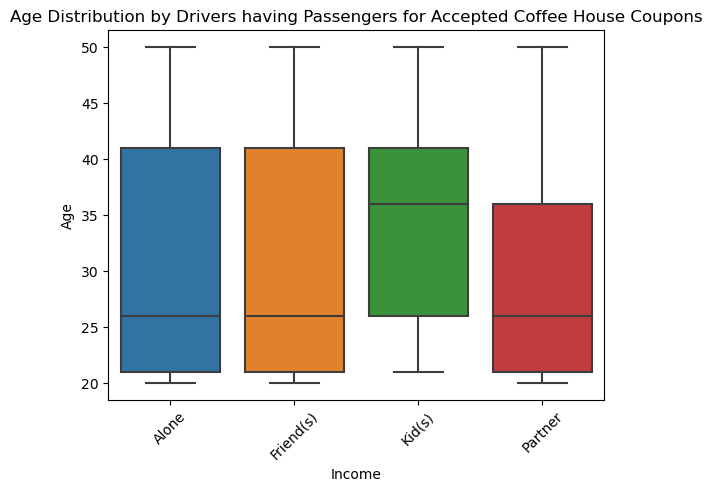

In [97]:
sns.boxplot(x='passanger', y='age', data=coffee_house_coupon_accepted)

plt.xticks(rotation=45)

plt.title('Age Distribution by Drivers having Passengers for Accepted Coffee House Coupons')
plt.xlabel('Income')
plt.ylabel('Age')

plt.show()

### Hypothesis

Based on the analysis of coffee house coupon acceptance, we can form the following hypothesis:

1. **Age and Coupon Acceptance**
	- Hypothesis: Drivers within the age range of 20-30 are the most likely to accept coffee house coupons, followed by drivers aged 30-35 and those above 50.
	- Rationale: Younger drivers may have a higher propensity for social activities like visiting coffee houses, while older drivers might have different motivations, such as leisure time or established routines that include coffee consumption.

2. **Travel Direction and Coupon Acceptance**
	- Hypothesis: Drivers who are traveling in the opposite direction from their destination are more likely to accept coffee house coupons.
	- Rationale: Drivers going in the opposite direction may have more flexibility in their travel plans, making them more open to detours such as stopping for coffee.

3. **Time of Day and Coupon Acceptance**
	- Hypothesis: Coffee house coupons are more likely to be accepted in the evening around 6 PM and the next most popular time is in the morning around 7 AM.
	- Rationale: Evening coffee consumption might be linked to socializing after work or evening activities, while morning coffee is a common routine for starting the day.

4. **Coupon Expiry and Usage**
	- Hypothesis: Coffee house coupons with a 1-day expiry are 25% more likely to be used compared to those with a 2-hour expiry.
	- Rationale: Longer expiry times provide more flexibility and convenience, leading to higher acceptance rates.

### Next Steps for Analysis

1. **Detailed Analysis of Travel Direction and Coupon Usage Time**
	- Objective: Understand how the direction of travel and the time of day influence coupon acceptance.
	- Action: Create cross-tabulations and visualizations to examine the relationship between travel direction, time of day, and coupon acceptance rates.
    
2. **Age and Occupation Analysis within a Specific Range**
	- Objective: Determine if certain occupations are more likely to accept coffee house coupons within the age range of 20-35.
	- Action: Filter the dataset to include only drivers aged 20-35 and create visualizations to compare coupon acceptance rates across different occupations.